In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
#get train data
train = pd.read_csv('../apartment/train.csv')
#train.info()

In [4]:
from sklearn import preprocessing

catagorical_cols=[]
for column in train.columns.values:
    if (train[column].dtype=='O'):
        catagorical_cols.append(column)


for x in catagorical_cols:
    train[x]=train[x].fillna('None')
    
for x in catagorical_cols:
    label = preprocessing.LabelEncoder()
    train[x] = label.fit_transform(train[x])

In [3]:
#1stFlrSF and 2ndFlrSF

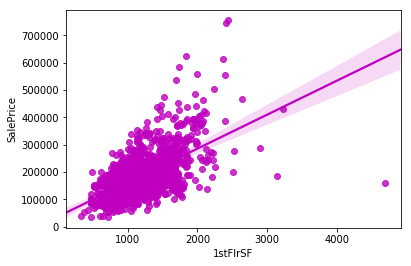

In [14]:
x=train['1stFlrSF']
y=train['SalePrice']
sns.regplot(x, y, data=train,color = "m")

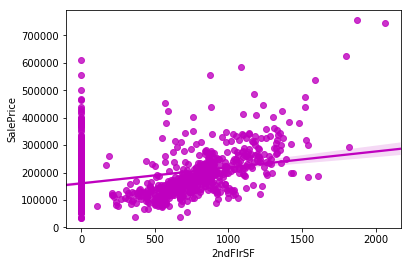

In [13]:
x=train['2ndFlrSF']
y=train['SalePrice']
sns.regplot(x, y, data=train,color = "m")

In [15]:
combine = train['1stFlrSF']+train['2ndFlrSF']

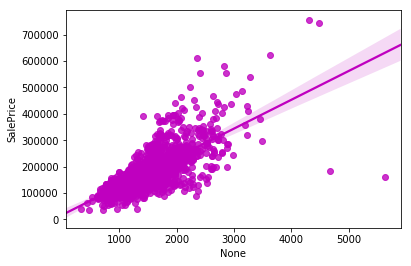

In [17]:
x=combine
y=train['SalePrice']
sns.regplot(x, y, data=train,color = "m")

In [5]:
train['1stFlrSF_and_2ndFlrSF'] = train['1stFlrSF']+train['2ndFlrSF']+train['TotalBsmtSF']+train['GrLivArea']
train['CarPerArea']=train['GarageArea']/train['GarageCars']
train['CarPerArea']=train['CarPerArea'].fillna(train['CarPerArea'].mean())

In [ ]:
#GrLivArea

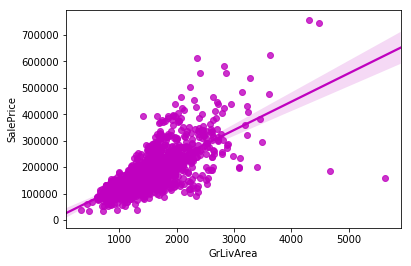

In [18]:
x=train['GrLivArea']
y=train['SalePrice']
sns.regplot(x, y, data=train,color = "m")

In [20]:
combine1 = train['GrLivArea']+train['1stFlrSF_and_2ndFlrSF']

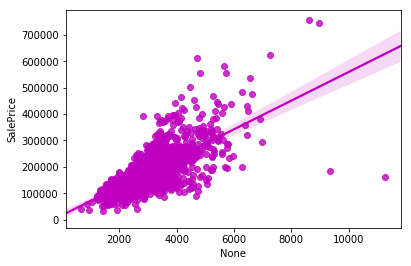

In [21]:
x=combine1
y=train['SalePrice']
sns.regplot(x, y, data=train,color = "m")

In [ ]:
train['All_Area'] = train['1stFlrSF_and_2ndFlrSF']+train['GrLivArea']
train.drop('GrLivArea',1)

In [6]:
cols =['OverallQual','1stFlrSF_and_2ndFlrSF','CarPerArea','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd']

In [7]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import numpy as np

In [8]:
#cols =['OverallQual','GrLivArea','CarPerArea','basementAnd1stFloorArea','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd']
X = train[cols].values.astype(np.float64)
y = train['SalePrice'].values.astype(np.float64)

#minmaxscaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1)).fit(X)
#X_scaled = minmaxscaler.fit_transform(X)
#y_scaled = minmaxscaler.fit_transform(y.reshape(-1,1))
#X_train,X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=42)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train2 = X_train
y_train2 = y_train

minmaxscaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1)).fit(X)
X_train = minmaxscaler.fit_transform(X_train)
#y_train = minmaxscaler.fit_transform(y_train.reshape(-1,1))
X_test = minmaxscaler.transform(X_test)
#y_test = minmaxscaler.transform(y_test.reshape(-1,1))

In [9]:
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=150),
        'LinearRegression':linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'SGDRegressor':SGDRegressor(max_iter=5, tol = None),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'MLPRegressor':MLPRegressor(solver='adam', activation = 'relu',hidden_layer_sizes=20, max_iter=1000, learning_rate='adaptive', random_state= None),
        'Lasso':Lasso(alpha = 0.1,max_iter=1000,random_state=None)
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train.ravel())   #why need to make this ravel()??
        y_pred = clfs[clf].predict(X_test)
        #print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)))
        #print(clf + " score:" + str(np.mean(np.absolute(y_pred-y_test))))
        print(clf + " score:" + str(np.sqrt(np.mean((np.log(y_pred)-np.log(y_test))*(np.log(y_pred)-np.log(y_test))))))
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm score:0.41175186164477007
RandomForestRegressor score:0.15949650693209175
LinearRegression score:0.2140826475587207
DecisionTreeRegressor score:0.2131180589847309
SGDRegressor score:0.2714248331558841
GradientBoostingRegressor score:0.15998582511932646
MLPRegressor score:4.377559169486001
Lasso score:0.21407870737360832


D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
